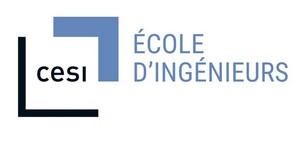

# CESI Ecole d'ingénieurs
### Campus Reims

------------------------------------------------
# Bloc Algorithmique avancé - Projet de l’ADEME
------------------------------------------------
\\
Kévin FRIEDRICH
Colin HAMEREL
Pierre AVERLY \\
Pilote : Kévin Thomas \\
Promo : A3 FISE Info.

# Livrable 2 : Modélisation

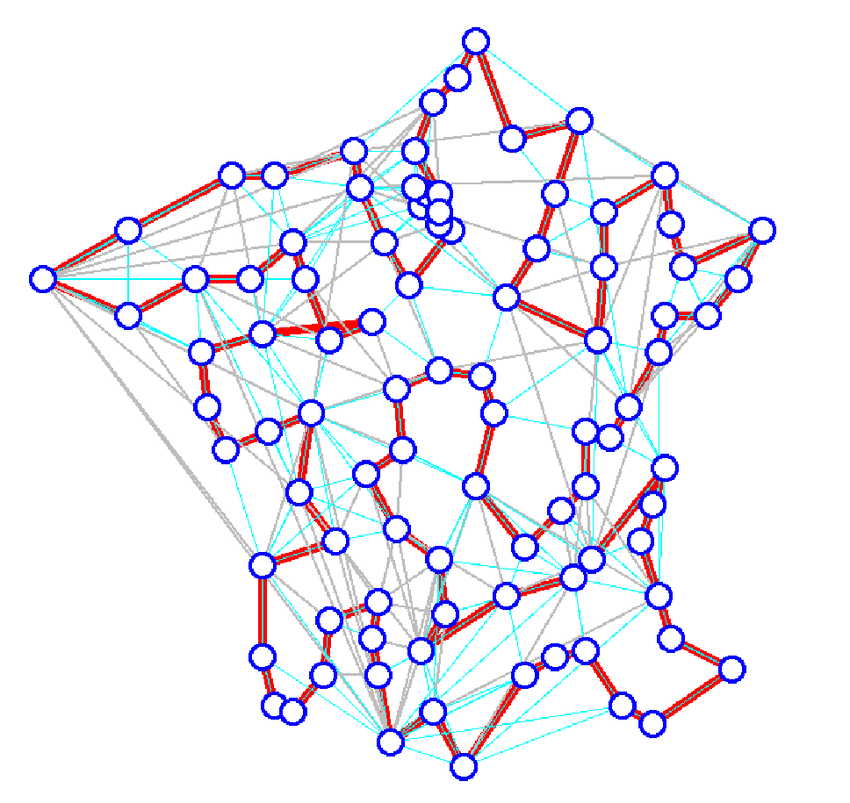

# Table des matières
1. [Introduction](#Introduction)
    1. [Contexte](#Contexte)
    2. [Objectifs](#Objectifs)  
     
<br>
     
2. [Modélisation](#Modélisation)
    1. [Défintion du problème](#Définition-du-problème)
    2. [Algorithmes existants](#Algorithmes-existants)
    3. [Solutions retenues](#Solution-retenues)

<br>

3. [Implémentation](#Implémentation)
    1. [Génération aléatoire des graphes](#Gen-graph)
    2. [Implémentation linéaire](#Implémentation-linéaire)
    3. [Implémentation du modèle](#Implémentation-du-modèle)
    4. [Etude du modèle](#Etude-du-modèle)
    5. [Statistiques](#Statistiques)
  
<br>

4. [Bibliographie et références](#Bibliographie-et-références)


## Introduction <a name="Introduction"></a>

Depuis les années 90, il y a eu une véritable prise de conscience mondiale de la nécessité de réduire la consommation d'énergie et des émissions de gaz à effet de serre. Les premiers engagements sont apparus lors de la signature du protocole de Kyoto en 1997. Mais son entrée en vigueur n'a finalement eu lieu qu'en 2005 et de nombreux scientifiques ont jugé les efforts insuffisants pour ralentir le réchauffement climatique. Depuis, d'autres engagements plus ambitieux ont vu le jour (division par 4 des émissions d'ici 2050 pour la France par exemple, engagements de certaines grandes villes comme Paris). Mais la tâche est compliquée. Les pouvoirs publics et les collectivités territoriales n'ont pas la possibilité d'obliger les entreprises et les particuliers à changer leurs habitudes pour atteindre ces objectifs. L'action se porte donc avant tout à faire évoluer les comportements. L'économie et le recyclage des matières premières, l'amélioration des modes de transports et des performances énergétiques des bâtiments doivent devenir des priorités.

###Contexte <a name="Contexte"></a>

Nous, CesiCDP, sommes engagés par l'ADEME pour la réalisation de plusieurs études sur le thème de la Mobilité Multimodale Intelligente.
Notre mission consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

A l'issue de ce projet et à la suite d'une Recherche Operationnelle, nous livreront un algorithme permettant de calculer la tournée optimale pour un réseau routier tout en respectant une des contraintes proposées par l'ADEME. Cette tournée optimale devra être calculée en utilisant une métaheuristique, c'est-à-dire une méthode de résolution de problèmes.

### Objectifs <a name="Objectifs"></a>

+ Échéance : 29/06/2022

+ Évaluation : Oui

+ Objectif : Présenter l'ensemble de la démarche réalisée, la réalisation technique et conclure sur les résultats obtenus

+ Description : ce livrable se co²mpose de 2 parties

PARTIE 1 : Modélisation

Reprend les éléments de modélisation formelle mis à jour

Décrit la méthode de résolution choisie : détails sur l'algorithme utilisé, c’est-à-dire la métaheuristique choisie et la modélisation du problème selon le formalisme de cette métaheuristique (voisinage, opérations de croisement…)

PARTIE 2 : Implémentation et exploitation

Implémentation :

L’implémentation de cet algorithme

Une démonstration du fonctionnement de cette implémentation, sur différents cas de test (pas besoin d’être exhaustif)

Exploitation : Etude expérimentale

Expliquer le comportement expérimental de votre solution. Cette partie du livrable devra proposer et implémenter un plan d’expérience complet démontrant les performances de votre algorithme, ses limitations, et les perspectives d’amélioration que vous proposez sur la base de votre analyse.

La méthodologie de ce plan d’expérience, les analyses que vous proposerez sur la base des résultats statistiques obtenus, et les propositions d’améliorations que vous en déduirez, devront être justifiés de manière détaillée.

## Modélisation <a name="Modélisation"></a>

### Définition du problème <a name="Définition-du-problème"></a>
#### **_Représentation formelle du problème_** 

Lors du projet, l'intêret est de pouvoir déterminer un algorithme permetant de passer à travers toutes les villes de manière optimisé. Même si l'aspect d'otpimisation est un critère important, un autre critère très important est le temps de traitement. En effet, au détriment de l'optimisation il faut concevoir un algorithme ayant un temps de calcul raisonable.

C'est pourquoi au préalable il va falloir déterminer la complexité de l'algorithme répondant à ce problème.

#### **_Représentation formelle des données_** 

##### **Problème d'optimisation**

_Données_ : G = ( V , E , W ) avec v dans V. \\
G est un graphe non complet pondéré 

_Question/Objectif_ : Quel est le cycle hamiltonien le plus court partant de v?

##### **Problème de décision**

_Données_ : G = ( V , E , W ) avec v dans V et k dans Z.
G est un graphe non complet pondéré 

_Question/Objectif_ : Existe-t-il un cycle hamiltonien dont la longueur est inférieur ou égale à k ?

##### **Contrainte du problème**

Lors de ce projet il été possible de choisir entre plusieurs contraintes à satisfaire. Dans notre projet nous avons décidé de satisfaire la contrainte suivante : 
- Autoriser les livraisons selon une plage horaire.

Cela correspond donc à devoir se rendre sur un point précis de notre graphe (une ville) pendant une période de temps donné. 

### **_Complexité du problème_**

Après avoir analyser les données du problème, on va donc chercher à déterminer la complexité de notre problème que l'on va nommer P1 qui nous permet de trouver le cycle hamiltonien le plus court en partant de v dans notre graphe G.

On suppose que la complexité du problème d'un graphe complet pondéré, que l'on va nommer P2 est NP-complet, suite à la corbeille d'exercice dans laquelle nous avions prouvé que le problème du Voyageur de Commerce (un graphe complet) est NP-complet.

Suite à cela, on va réduire notre problème P1 au problème P2. Pour se faire on va donc :

+ Choisir **I1** une instance de notre problème *P1* que l'on défini 
+ Reduire à une instance **I2** de notre problème *P2*
+ Utiliser l'agorithme de Dijsktra

#### **Détermination du problème**

Notre instance I1 va donc être représenté par le graphe G, et notre instance I2 va être représentée par le graphe G'

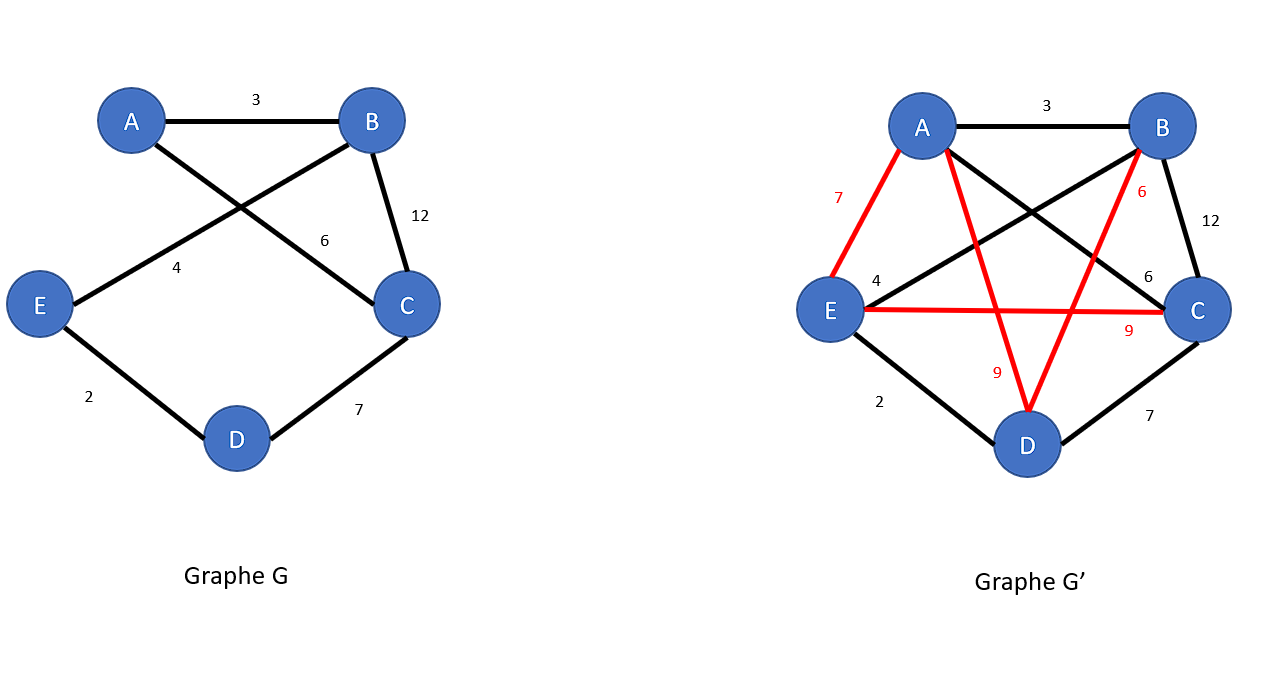

On a donc l'algorithme de Djikstra qui est :
+ Pour chaque cellule de la matrice :
  + Si pas de liaison :
    + Chercher le chemin le plus court entre 2 sommets
    + On pondère cette arête avec la distance obtenue
    + On stocke le chemin le plus court obtenu

Les nouveaux chemins vont donc être :
+ AE --> ABE --> 3+4 = 7
+ AD --> ABED --> 3+4+2 = 9
+ EC --> EDC --> 2+7 = 9
+ BD --> BED --> 4+2 = 6 \

On va donc pouvoir représenter nos nouveaux chemins crées par l'algorithme de Djikstra sur notre instance I2 par des nouvelles arêtes avec un poids du chemin le plus court (en rouge).  \

#### **Calcul de la complexité**

Pour le calcul de la complexité de cette réduction on va donc parcourir notre matrice de n sur n (donc une complexité de n²), et on ajoute à cette complexité celle de l'algorithme de Djikstra, qui est de $n*log(n)$.
La complexité de notre réduction va donc être $n²(n*log(n))$, donc $n^3*log(n)$
Cette complexité s'effectue dans un temps polynomial $O(n^k)$

#### **NP-Difficile**
On peut donc en conclure que I1 est réductible en temps polynomial en I2, donc notre problème P1 est se réduit polynomialement en P2.
Donc P1 est au moins aussi difficile que P2, qui se traduit par la notation P1 $\ge$ P2.
Or, on sait que P2 est NP-complet.
Notre problème P1 est donc NP-difficile.

#### **NP-Complet**
Pour prouver que notre problème est NP-complet, il suffit maintenant de prouver qu'on peut également réduire un graphe hamiltonien à notre problème.  
On définit P3 le probleme d'un cycle hamiltonien.  
On sait que la complexité du probleme permettant de trouver un cycle hamiltonien dans le graphe n°3 est NP-complet.  
On va donc reduire P1 à P3, on choisit une instance I1 de notre problème P1, on reduit cette instance a I3 du problème P3.  
Les deux instances sont identiques et donc résoudre P1 revient a résoudre P3.  
Or, on sait que P3 est NP-complet, donc P3 est au moins aussi difficile que P1.  P1 $\le$ P3
Or, on sait que P1 est NP-difficile et P3 est np complet donc P1 est NP-complet 
P1 $\ge$ P2.

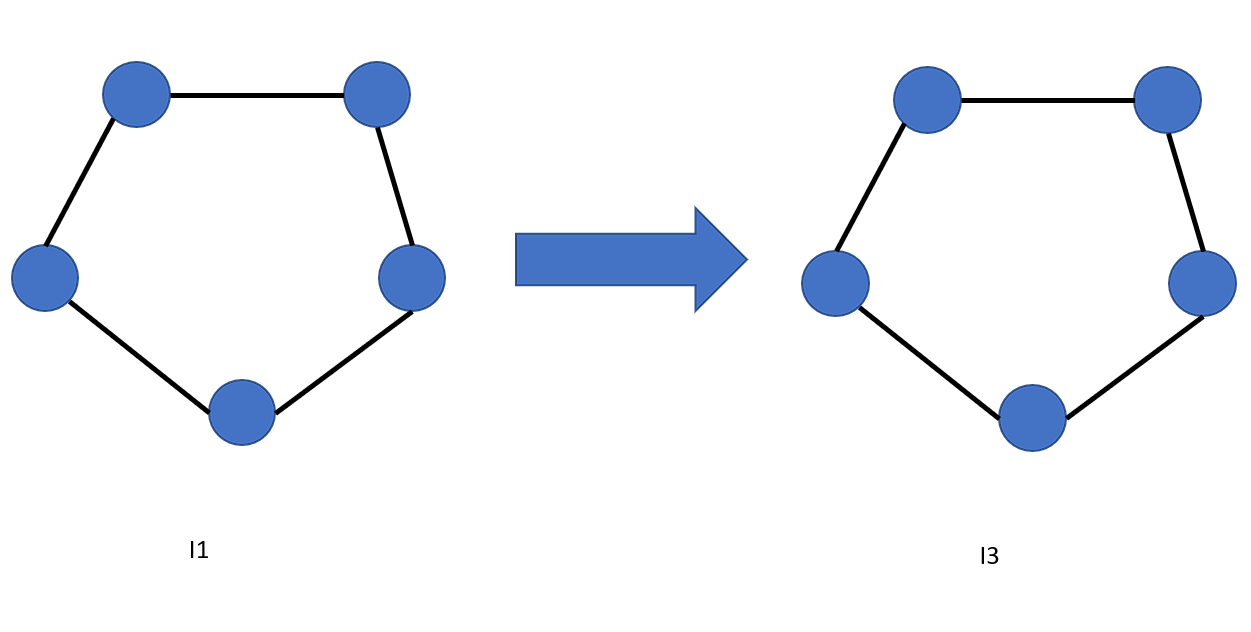

#### **Algorithme de certification**

Pour bien valider notre problème, nous allons utiliser un algorithme de vérification de notre problème.
Pour cela, il va falloir valider notre problème de décision. \

On peut utiliser l'algorithme de Prim, permettant de calculer un arbre couvrant minimal.
Données: Un graphe G = ( V , E , W ) avec v dans V, un entier k ∈ Z.
Notre algorithme va donc retourner _VRAI_ si on trouve un chemin tel qu'il passe par tous les sommets et est inférieur à k, et _FAUX_ si ce n'est pas le cas.
On va prendre un sommet de base, puis prendre le chemin le plus court jusqu'à un de ses voisins, puis partir de ce voisin, et recommencer ainsi de suite jusqu'à obtenir un cycle passant par tous les sommets.

Chaque itération a une complexité de $O(n)$  et l'algorithme global a une complexité de $O(n^2)$ 

### Algorithmes existants <a name="Algorithmes-existants"></a>

#### Programmation linéaire
La programation est une méthode de résolution d'une fonction linéaire. Son objectif principal est de déterminer l'optimum d'une fonction dite "économique" en tenant comptes des contraintes imposés. \
Cette méthode permet de trouver un minimum ou maximum (en fonction de la demande).

L'une des méthodes les plus connues en programation Linéaire est le **Simplexe**. Cette méthode est très efficace et simple à mettre en place.
Cependant son utilisation reste très limité.

Il suffit de respecter les étapes suivantes afin de réaliser un Simplexe :
- Lister ses différentes variables
- Lister et expliciter les contraintes
- Résoudre le problrème (graphique ou analytique)

Selon l'application, la résolution graphique peut être possible (pour de petites instances) alors que la méthode analytique est certes plus complexes à résoudre mais cette dernière est plus efficaces.

Néanmoins la résolution va énormément dépendre du nombre de variables présentes dans le problèmes. Cela va représenter notre dimension du problèmes (très visible sur un exemples graphique). Et après 2 variables, le problèmes devient extrêment complexe (voir impossible). C'est pour cela que cette méthode est très limité d'utilisation.

#### Modélisation heuristique

Une solution pour répondre à un problème NP-Difficile est d'abord une approche heuristique.

L'heuristique permet de résoudre des problèmes à partir de connaissances incomplètes. Ce type d'analyse permet d'aboutir en un temps limité à des solutions acceptables, donc approximatives de notre solution optimale.

Cela est possible grâce à l'intensification.
On part d'une valeur de base, que l'on va essayer d'optimiser au maximum, tant qu'on peut découvrir des meilleurs valeurs à partir de celle-ci. 

Des exemples d'algorithmes heuristiques sont :
L'algorithme de recherche A* (A-star), qui permet de déterminer le meilleure chemin entre deux noeuds.
La méthode hill-climbing, qui est une méthode d'optimisation permettant de trouver un optimum local parmi un ensemble de configurations.

Nous allons prendre l'exemple de l'algorithme Hill Climbing.
Il s'effectue en plusieurs étapes:

<ol>
        <li>On considère une solution initiale.</li>
        <li>Une boucle génère tous les voisins de la solution courante, et choisit la meilleure comme nouvelle solution courante.</li>
        <li>On sort de la boucle lorsqu'elle ne permet plus de trouver une solution meilleure que la solution courante.</li>
    </ol>

La solution générée est donc la solution locale la plus optimale parmi les voisins de notre solution de base.

Cependant, une solution locale aléatoire est souvent loin d'être la plus optimisée pour notre fonction, car une limite de notre algorithme est qu'il reste bloqué à une seule de ces solutions locales de notre problème, qui en comporte bien plus.

Pour répondre à cette problèmatique, nous allons donc introduire la modélisation méta-heuristique.


#### Méta-Heuristique


Là où les les Heuristiques, ont pour but de trouver un minimum/maximum local, les metaheurstique ont pour but de trouver une solution sur l'ensemble du problème avec un temps "raisonable" ainsi qu'un précision maximisé.

En effet, si on chercherait un minimum ou maximum sur l'ensemble d'un problème, l'algortithme pourrait potentiellement tourner pendant une très longue période (voir même à l'infini). 

C'est pourquoi les algorthimes métaheuristique permetent de dégrader la solution final et donc pouvoir proposer une solution.

Il existe un grand nombre de métaheuristique qui ont toutes des caractéristiques différentes :


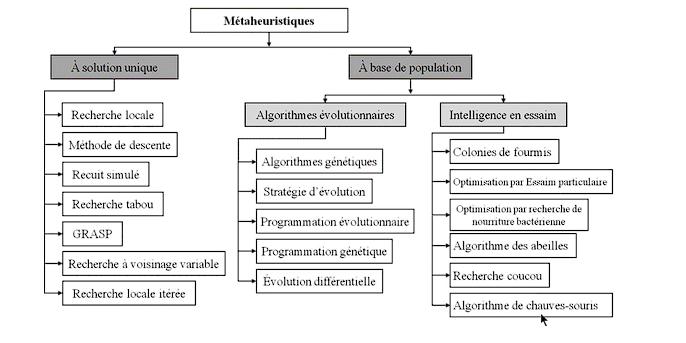

### Solutions retenues <a name="Solutions-retenues"></a>

#### Programmation linéaire

Pour identifier notre problème, il faut d'abord définir les variables et les contraintes de celui-ci.

Variables de décision :

$P{i,j}$, qui représente l'ensemble du poids des arêtes dans notre graphe

$X{i,j}$, qui représente l'ensemble des chemins entre les sommets dans notre graphe

$D{Xij} =  {0,1}$

Contraintes :

C1 : $\sum{i=1}^{n} x{ij}= 1$, qui nous permet de restreindre à un seul chemin entrant par point (ville)

C2 : $\sum{j=1}^{n} x{ij}= 1$, qui nous permet de restreindre à un seul chemin sortant par point (ville)

Fonction économique :

Min Z = $\sum{i=1}^{n}\sum{j=1}^{n} p{ij}x{ij}$

Comme précisé précedemment , on a vu que la programmation linéaire ne pouvait pas répondre aux problèmes compliqués, avec des contraintes trop restrictives.

Cependant, cela va nous permettre de sortir une valeur optimale (borne inférieure) de notre problème, en ne respectant pas les contraintes.
Le but est donc de s'approcher de cette borne inférieure le plus possible à l'aide de la modélisation heuristique et plus particulièrement méta-heuristique, afin d'apporter à nos algorithmes les principes d' intensification et de diversification. 



#### Méta-heuristique

En ce qui concerne les méta-heuristiques, celles sélectionnées sont : 

- Colonies de fourmis (métaheuristique d'intelligence en essaim): 
C'est un algorithme qui s’inspire du comportement des fourmis recherchant un chemin entre leur colonie et une source de nourriture.
Plus les fourmis vont passer par un chemin court, plus elles vont déposer des phéromones sur ce chemin.
Ainsi, les fourmis vont prendre le chemin sur lequel il y'aura le plus de phéromones, qui sera donc le chemin le plus court.


- Algorithme génétique (algorithme métaheuristique évolutionnaire):
Les algorithmes génétiques utilisent la notion de sélection naturelle et l'appliquent à une population de solutions potentielles au problème donné. La solution est approchée par « bonds » successifs, comme dans une procédure de séparation et évaluation (branch & bound).

- Recherche par Tabou (métaheuristique à solution unique):
Les mécanismes de la recherche par Tabou sont des interdictions temporaires de certains mouvements (mouvements tabous). Il s’agit d’interdire les mouvements qui risqueraient d’annuler l’effet de mouvements effectués récemment. A chaque itération, l’algorithme tabou choisit le meilleur voisin non tabou, même si celui-ci dégrade la fonction de coût. Pour cette raison, on dit de la recherche avec tabou qu’elle est une méthode agressive.

## Implémentation <a name="Implémentation"></a>

### Génération aléatoire des graphes <a name="Gen-graph"></a>

Pour commencer nos algorithmes, il faut déjà générer des instances aléatoires de notre problème, donc un nombre de villes d'une taille choisie, ainsi que les villes que l'on doit visiter, que l'on va générer aléatoirement également. 



In [ ]:
from pulp import *
import numpy as np
import random
from dijkstar import Graph, find_path

# Creation d'une ville sur une carte donnée
def generate_nodes(number,max_x=1080,max_y=720):
    """
    Créer une liste de villes sous forme de coordonnées
    
    Parameters
    ----------
    number : int
        Nombre de ville a générer sur la carte
    max_x : int, optional
        Maximum de la largeur de la carte. The default is 1080.
    max_y : int, optional
        Maximum de la hauteur de la carte. The default is 720.
    """
    # Initialisation de la liste de villes
    nodes = []
    # Boucle pour générer les villes
    for i in range(number):
        # Génération des coordonnées de la ville
        nodes.append([random.randint(0.1*max_y,max_x-0.1*max_y),random.randint(0.1*max_y,max_y-0.1*max_y)])

    return nodes



# Retourne la distance entre 2 points (x1,y1) et (x2,y2)
def distance(x1,y1,x2,y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5



# Retourne la matrice de distance entre les villes
def coordinats_to_matrice(nodes,prob):
    """
    Créer une matrice de distance entre les villes
    
    Parameters
    ----------
    nodes : list
        Liste de villes
    """
    matrice = np.ones((len(nodes),len(nodes)))*np.inf
    for x in range(len(nodes)):
        for y in range(len(nodes)):
            if random.uniform(0,1)<prob:
                matrice[x][y] = distance(nodes[x][0],nodes[x][1],nodes[y][0],nodes[y][1])
                matrice[y][x] = matrice[x][y]
            if x == y :
                matrice[x][x] = np.inf
    return matrice



# Génère une liste de villes aléatoire par lesquelles passer 
def random_city(graph, nb_city):
    if (nb_city <= len(graph)):
        return random.sample(range(len(graph)),nb_city)



# Convertit le graphe en format adapté à dijkstra
def convert_graph(graph):
    graph_dijkstra = Graph()
    for i in range(len(graph)):
        for j in range(len(graph)):
            graph_dijkstra.add_edge(i, j,graph[i][j])
    return graph_dijkstra



# Génère le graphe complet des villes générées aléatoirement
def cities_complet(graph, cities, format_is_inf):
    """
    Créer un graphe complet des villes séléctionnées

    Parameters
    ----------
    graph : list
        Graphe des distances entre les villes
    cities : list
        Liste de villes séléctionnées
    """
    graph_cities = np.zeros((len(cities),len(cities)))
    graph_dji = convert_graph(graph)
    for index_city, city in enumerate(cities):
        for index_city2, city2 in enumerate(cities):
            graph_cities[index_city][index_city2] = graph[city][city2]
    for index, city in enumerate(graph_cities):
        liaisons = np.where(city == np.inf)
        liaisons = np.delete(liaisons,np.where(liaisons[0] == index))
        for col in liaisons:
            shortest_path = find_path(graph_dji,cities[index],cities[col])
            graph_cities[index][col] = shortest_path.total_cost
    if format_is_inf == False:
        for i in range(len(cities)):
            graph_cities[i][i] = 0
    return graph_cities



# Fonction de contrainte pour générer au moins un chemin entrant et un chemin sortant pour chaque ville
def input_output_contrainte(matrice, max_value):
  """
    fonction pour générer au moins 2 aretes par sommets

    Parameters
    ----------
    matrice : list
        graphe d'entré
    max_value : int
        Valeur maximale des distances
    """
    for i,line in enumerate(matrice):
        arr = np.where(line == np.inf)[0]
        arr = np.delete(arr,np.where(arr == i))
        while len(arr) > len(matrice)-3:
            index = random.choice(arr)
            matrice[i][index] = random.randint(1,max_value)
            arr = np.delete(arr,np.where(arr == index))
    for i in range(len(matrice)):
        for j in range(len(matrice)):
            if matrice[i][j] != np.inf:
                matrice[j][i] = matrice[i][j]
    return matrice



# Génère tout le dataset d'une instance
def random_matrix_generator(size_graph,size_cities, max_value_x, max_value_y, prob, format_is_inf=True):
    """
    Génère toutes les matrices d'une instance

    Parameters
    ----------
    size_graph : int
        Taille du graphe
    size_cities : int
        Taille des villes
    max_value : int
        Valeur maximale des distances
    prob : float
        Probabilité de la distance infini
    complet_is_inf : bool, optional
        True si le format de sortie du graphe complet doit être infini. The default is False.
    """
    # Génération des villes
    matrix_coordonate = generate_nodes(size_graph,max_value_x,max_value_y)
    # Génération de la matrice de distance
    matrix_distance = coordinats_to_matrice(matrix_coordonate,prob)
    # Génération si full 0 sur la ligne
    matrix_distance = input_output_contrainte(matrix_distance, max_value_x)
    # Création de la liste des villes
    random_cities = random_city(matrix_distance,size_cities)
    # Génération du graphe complet
    city_completed = cities_complet(matrix_distance, random_cities, format_is_inf)

    return matrix_coordonate, matrix_distance, random_cities, city_completed

Nous pouvons donc générer notre graphe complet final, qui est constitué seulement des villes par lesquels nous voulons passer.

A l'aide de nos fonctions, nous pouvons jouer sur les parametres afin de génerer plusieurs instances de notre problème, chacune différente l'une de l'autre, en modifiant le nombre de villes total, le nombre de villes par lesquelles passer, la taille de la carte, etc..

In [ ]:
nb_city_total = 50
nb_city_selectionned = 10
max_value_x = 1080
max_value_y = 720
probability = 0.2

matrix_coordonate, matrix_distance, random_cities, matrix_city_completed = random_matrix_generator(nb_city_total,nb_city_selectionned,max_value_x,max_value_y,probability,False)


print("Matrice coordonées : \n",matrix_coordonate)
print("\n---------------------------------------------------------------------------------------\n")
print("Matrice distance : \n",matrix_distance)
print("\n---------------------------------------------------------------------------------------\n")
print("Liste des villes : \n",random_cities)
print("\n---------------------------------------------------------------------------------------\n")
print("Graphe complet : \n",matrix_city_completed)

Une fois notre graphe complet de villes sélectionnées généré, nous allons pouvoir ensuite calculer le meilleur itinéraire possible en passant par chaque ville à l'aide de nos méthodes méta-heuristiques.

### Implémentation de la programmation linéaire <a name="Implémentation-linéaire"></a>

Comme énoncé lors de la modélisation, la première étape est d'implémenter la programmation linéaire pour notre problème.

Nous allons utiliser un Simplexe pour le résoudre, à l'aide de la library "Pulp" de Python.

Il faut donc définir nos variables, nos contraintes et notre objectif et Pulp va faire le travail de résolution linéaire pour nous :

In [ ]:
import pulp
import pandas as pd
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
import time
import copy

def plot_fig(loc,heading="plot"):
    """
    fonction pour dessiner notre courbe en fonction des villes

    Parameters
    ----------
    loc : Coordonnées

    """
    plt.figure(figsize=(10,10))
    for i,row in loc.iterrows():
        if i==0:
            plt.scatter(row["x"],row["y"],c='r')
            plt.text(row["x"]+0.2, row["y"]+0.2, 'DELHI (depot) ')
        else:
            plt.scatter(row["x"], row["y"], c='black')
            plt.text(row["x"] + 0.2, row["y"] + 0.2,full_data.loc[i]['CITy'] )
        plt.ylim(6,36)
        plt.xlim(66,96)
        plt.title(heading)

        
def get_plan(r0):
  """
  fonction pour générer tous les sous chemins du graphe
  """
    r=copy.copy(r0)
    route = []
    while len(r) != 0:
        plan = [r[0]]
        del (r[0])
        l = 0
        while len(plan) > l:
            l = len(plan)
            for i, j in enumerate(r):
                if plan[-1][1] == j[0]:
                    plan.append(j)
                    del (r[i])
        route.append(plan)
    return(route)

def prog_lineaire(graph_complet_cities, random_cities):
    """
    Fonction pour réaliser le simplexe à l'aide de Pulp
    
    Parameters:
        graph_complet_cities : graphe complet de liste   
        random_cities : liste de villes séléctionnées

    Returns:
        route_plan: liste de la route
        subtour: liste des subtours
        time_taken: temps de calcul
        status : Statut de l'opti
        value : Valeur de l'objectif
    """
    no_of_locs = len(graph_complet_cities)

    dis_mat= graph_complet_cities

    start_t_1=time.time()
    model=pulp.LpProblem('tsp',pulp.LpMinimize)
    #define variable
    x=pulp.LpVariable.dicts("x",((i,j) for i in range(no_of_locs) \
                                    for j in range(no_of_locs)),\
                            cat='Binary')
    #set objective
    model+=pulp.lpSum(dis_mat[i][j]* x[i,j] for i in range(no_of_locs) \
                        for j in range(no_of_locs))
    # st constraints
    for i in range(no_of_locs):
        model+=x[i,i]==0
        model+=pulp.lpSum(x[i,j] for j in range(no_of_locs))==1
        model += pulp.lpSum(x[j, i] for j in range(no_of_locs)) == 1
        
    status=model.solve()

    route=[(i,j) for i in range(no_of_locs) \
            for j in range(no_of_locs) if pulp.value(x[i,j])==1]
    route_plan=get_plan(route)
    subtour=[]

    while len(route_plan)!=1:
        for i in range(len(route_plan)):
            model+=pulp.lpSum(x[route_plan[i][j][0],route_plan[i][j][1]]\
                                for j in range(len(route_plan[i])))<=\
                                len(route_plan[i])-1
        status=model.solve()
        route = [(i, j) for i in range(no_of_locs) \
                    for j in range(no_of_locs) if pulp.value(x[i, j]) == 1]
        route_plan = get_plan(route)
        
        subtour.append(len(route_plan))

    for i in range(len(route_plan[0])):
        temp_list = list(route_plan[0][i])
        temp_list[0], temp_list[1] = random_cities[route_plan[0][i][0]], random_cities[route_plan[0][i][1]]
        route_plan[0][i] = tuple(temp_list)

    return route_plan,subtour,time.time()-start_t_1,pulp.LpStatus[status],pulp.value(model.objective)

Cette programmation linéaire permet donc de ressortir la route la plus adaptée entre toutes nos villes.

In [ ]:
route_plan,subtour,time,status,value = prog_lineaire(matrix_city_completed, random_cities)

print("Route :", route_plan)
print("Subtour :", subtour)
print("Time :", time)
print("Status :", status)
print("Value :", value)

Cependant, cette méthode de résolution linéaire ne respecte pas nos contraintes fixées de base.

Elle nous permet toutefois d'obtenir une borne inférieure de notre problème, que nous allons pouvoir utiliser pour en être le plus proche possible avec nos méthodes métaheuristiques.


### Implémentation des modèles <a name="Implémentation-du-modèle"></a>

#### **Algorithme des fourmis** 



In [ ]:
#imports

import numpy as np
import random
import time


def random_matrice_pondere(size,max_wheight,seed=5):
    """Génère un graph complet pondéré aléatoirement.

    Args:
        size (int): nombre de nodes dans un graph.
        max_wheight (_type_): valeure maximale des poids des edges.
        seed (int, optional): Seed pour le random. Defaults to 5. None to random.

    Returns:
        matrice: matrice de size*size pondérée de type numpy.array
    """
    np.random.seed(seed)
    matrice = np.random.random_sample((size,size)) * max_wheight
    for i in range(size):
        matrice[i][i] = np.nan
        for j in range(size):
            matrice[i][j] = matrice[j][i]

    return matrice

def random_path_generator(size,seed=None):
    """Génère un chemin aléatoire parmis une taille de nodes.

    Args:
        size (int): _description_
        seed (int, optional): Seed pour le random. Defaults to 5.

    Returns:
        ndarray: list de taille size contenant des valeurs entre 0 et size-1.
    """

    np.random.seed(seed)
    path = np.random.permutation(size)
    return np.append(path, path[0])

def path_to_matrice(path,wheight=1):
    """Transfert un chemin en matrice.

    Args:
        path (list): path
        wheight (int, optional): Valeure assignée aux poids. Defaults to 1.

    Returns:
        matrice: matrice des chemins
    """

    size = len(path)
    matrice = np.zeros((size,size))
    for value in range(0,len(path)-1):
        matrice[path[value]][path[value+1]] = wheight

    return matrice

def path_distance(path,matrice):
    """Calcule la distance d'un chemin.

    Args:
        path (list): path
        matrice (numpy.array): matrice des poids

    Returns:
        float: distance du chemin
    """
    

    distance = 0
    for i in range(len(path)-1):
        distance += matrice[path[i]][path[i+1]]

    return distance

def path_distance_constraint(path,matrice,constraint):
    """Calcule la distance d'un chemin.

    Args:
        path (list): path
        matrice (numpy.array): matrice des poids

    Returns:
        float: distance du chemin
    """
    if constraint["enabled"]:
        idx_constraint_city = path.index(constraint['start'])
        path = path[idx_constraint_city:] + path[0:idx_constraint_city] + [constraint['start']]

        constraint_path = path[0:path.index(constraint['city'])+1]

        distance = 0
        for i in range(len(constraint_path)-1):
            distance += matrice[constraint_path[i]][constraint_path[i+1]]

        official_path =    path_distance(path,matrice)

        if  distance <= constraint['superior_dist']:
            
            if distance >= constraint['inferior_dist']:
                return official_path

            else:
                return official_path+distance
        else:
            return official_path*2
            
    else:
        return path_distance(path,matrice)    



def calcul_path_pheromone(pheromone,size,start):
    """créé un chemin à partir d'un résultat de l'algorithme ACO
    """
    pheromone = np.nan_to_num(pheromone)
    final_path= [start]
    position = start
    for x in range(size-1):
        
        pheromone[:,position] = 0
        #print(res)
        position = np.argmax(pheromone[position])
        final_path.append(position)
    final_path.append(start)
    return final_path

def path_edge_selection(pheromone,matrice,start,alpha,beta):
    """Path edge selection pour l'aco

    Args:
        pheromone (numpy.array): array if pheromones
        matrice (numpy.array): matrice du path
        start (int): point de départ
        alpha (float): facteur de quantité de pheromone
        beta (float): facteur de désirabilité lié a la rapidité / distance de l'edge

    Returns:
        ndarray: path from start in pheromone/matrice
    """

    path = [start]
    nodes = range(len(pheromone))



    for rep in range(len(pheromone)-1):
        nodes_availables = [node for node in nodes if( (node not in path))]
        
        weigths_node = [(pheromone[path[-1]][y]) ** alpha * (1/matrice[path[-1]][y]) ** beta  for y in nodes_availables] 
        probas_nodes = [weigths_node[y]/sum(weigths_node) for y in range(len(weigths_node))]
        
        path.append(random.choices(nodes_availables, weights=probas_nodes, k=1)[0])

    path.append(start)

    return path

def delta_T_xy_ant(paths_ant_matrice_wheight,x,y,path,matrice,constraint): 


    

    if ((paths_ant_matrice_wheight[x][y] != 0)): # and path from index x  where dist_inf < n < dist_sup
        return 1/(paths_ant_matrice_wheight[x][y])
    else:
        return 0

def get_best_path(paths_ants,paths_ants_value):
    best_path =  paths_ants[np.argmin(paths_ants_value)]
    best_path_value = np.max(paths_ants_value)
    return best_path,best_path_value


def aco_algorithm(matrice,parameters,result,constraint):
    start_process_time = time.time()

    pheromone_matrice = random_matrice_pondere(len(matrice),1)
    #print(len(matrice))
    #print(len(pheromone_matrice))

    best_path = path_edge_selection(pheromone_matrice,matrice,0,parameters["a"],parameters["b"])
    best_score = path_distance_constraint(best_path,matrice,constraint)

    time_record = []
    min_local = []
    best_min_local = []



    for x in range(parameters["nb_iter_max"]):

        #Création des fourmis
        start = time.time()

        ants_start = np.random.randint(0,len(matrice),parameters["nbr_ant"])
        paths_ants = [path_edge_selection(pheromone_matrice,matrice,start,parameters["a"],parameters["b"]) for start in ants_start]
         
        time_paths_ants = time.time()-start
        
        #calcule des poids des path des fourmis
        start = time.time()

        paths_ants_value = [path_distance_constraint(path,matrice,constraint) for path in paths_ants]

        time_paths_ants_value = time.time()-start

        #calcule des 
        start = time.time()

        paths_ants_matrice_wheight = [path_to_matrice(paths_ants[index],paths_ants_value[index]) for index in range(len(paths_ants))]

        time_paths_ants_matrice_wheight = time.time()-start

        start = time.time()

        for i in range(len(matrice)):
            for j in range(len(matrice)):

                pheromone_matrice[i][j] = (1 - parameters["p"]) * pheromone_matrice[i][j] + sum(delta_T_xy_ant(paths_ants_matrice_wheight[index],i,j,paths_ants[index],matrice,constraint) for index in range(len(paths_ants_matrice_wheight)))

        time_pheromone_matrice = time.time()-start

        try_best_path,try_best_score = get_best_path(paths_ants,paths_ants_value)
        min_local.append(try_best_score)
        best_min_local.append(best_score)
        if try_best_score < best_score:
            best_path = try_best_path
            best_score = try_best_score


        
        time_record.append([time_paths_ants,time_paths_ants_value,time_paths_ants_matrice_wheight,time_pheromone_matrice])

        print("iteration : ",x,"/",parameters["nb_iter_max"]," score : ",best_score)
        print("path : ",best_path)
        #print("pheromones : ",pheromone_matrice)
        if time.time() - start_process_time > parameters["time_max"]:
            #print("time max reached",str(time.time() - start_process_time))
            break

    result.append((pheromone_matrice,best_path,best_score,time_record,min_local,best_min_local))


###
#
#
#parameters = {
#    "nbr_ant":np.arange(10,200,10), 100
#    "a":np.arange(0,4.25,.25), 1
#    "b":np.arange(1,4.25,.25), 1
#    "p":np.arange(0,1.05,.05), 0.1
#    "nb_iter_max":[200], 200
#    "time_max":[120],
#}

#resul_list = []

# aco.aco_algorithm(matrice,parameters,aco_result_list)

 #result_list[0]




#### **Algorithme approximation**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def aproximation_algorithm(matrix_coordonate, random_cities, n, matrix_city_completed):
    G = nx.Graph()
    for node in random_cities:
        G.add_nodes_from(random_cities)

    G = nx.complete_graph(random_cities)  # graph with a vertex for each city
    # for convenience, pick the city (x,y)- at random
    import random

    my_pos = { i : ( matrix_coordonate[i][0], matrix_coordonate[i][1] ) for i in random_cities } # pos[i] = (x_i, y_i)


    import math
    def eucl_dist(x1,y1,x2,y2):
        return ((x1-x2)**2 + (y1-y2)**2)**0.5

    for i,j in G.edges:
        (x1,y1) = my_pos[i]
        (x2,y2) = my_pos[j]
        G.edges[i,j]['length'] = matrix_city_completed[random_cities.index(i)][random_cities.index(j)]
    T = nx.minimum_spanning_tree(G,weight='length')

    tour = list(G.nodes)
    tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]

    import matplotlib.pyplot as plt

    improved = True
    while improved:
        improved = False
        for i in range(n):
            for j in range(i+1,n):
                
                cur1 = (tour[i],tour[i+1])
                cur2 = (tour[j],tour[(j+1)%n])
                cur_length = G.edges[cur1]['length'] + G.edges[cur2]['length']
                
                new1 = (tour[i],tour[j])
                new2 = (tour[i+1],tour[(j+1)%n])
                new_length = G.edges[new1]['length'] + G.edges[new2]['length']
                
                if new_length < cur_length:
                    tour[i+1:j+1] = tour[i+1:j+1][::-1]
                    improved = True
                    
                    # draw the new tour
                    tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
                    #plt.figure() # call this to create a new figure, instead of drawing over the previous one(s)
                    #plt.grid(True)
                    #nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)


    tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
    #nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)

    total_circuit_l = 0
    for i in range(len(tour)):
        if len(random_cities)>30:
            total_circuit_l = 1500
        total_circuit_l += G.edges[tour_edges[i][0],tour_edges[i][1]]['length']

    return tour_edges, total_circuit_l

#### **Algorithme génétique**

In [ ]:
# %%
import random
import numpy as np

# %%
def generate_nodes(number,max_x=1080,max_y=720,seed=None):
    # create number of nodes with coordinates of x,y  with max value of 600
    random.seed(seed)
    nodes = []
    for i in range(number):
        nodes.append([random.randint(0.1*max_y,max_x-0.1*max_y),random.randint(0.1*max_y,max_y-0.1*max_y)])
    return nodes

def distance(x1,y1,x2,y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

def coordinats_to_matrice(nodes):
    # create a matrice with the nodes coordinates
    matrice = np.zeros((len(nodes),len(nodes)))
    for x in range(len(nodes)):
        for y in range(len(nodes)):
            matrice[x][y] = distance(nodes[x][0],nodes[x][1],nodes[y][0],nodes[y][1])
    return matrice

# %%
parameters = {
    'nbr_sommet': 100,
    'nbr_indivudus':1000,
    'nbr_generation':1000,
    'prob_no_mutation':0.01,
    'prob_mutation_insertion':0.3,
    'prob_mutation_reversion':0.3,
    'prob_mutation_swap':0.3,
}

# %%
def generate_path(nbr_sommet):
    # create a path with the nodes coordinates
    path = []
    for i in range(nbr_sommet):
        path.append(i)
    random.shuffle(path)
    return path

#generate_path(10)


def generate_population(nbr_indivudus,nbr_sommet):
    # create a population with the nodes coordinates
    population = []
    for i in range(nbr_indivudus):
        population.append(generate_path(nbr_sommet))
    return population

def evaluate_path(path,matrice):
    # calculate the fitness of a path
    fitness = 0
    for i in range(len(path)-1):
        fitness += matrice[path[i]][path[i+1]]
    fitness += matrice[path[-1]][path[0]]
    return fitness

def evaluate_population(population,matrice):
    # calculate the fitness of each individual
    evaluation = []
    for i in range(len(population)):
        
        evaluation.append(evaluate_path(population[i],matrice))
    return evaluation


def selection_population(population,evaluation):
    #ponderate the population with the fitness
    weighted_evaluation = []
    for i in range(len(population)):
        weighted_evaluation.append(1/(evaluation[i]**10))
    #print("len(population) ",len(population))
    parents = random.choices(population,weights=weighted_evaluation,k=int(len(population)/2))

    return parents

def crossover(parents,nbr_sommet):

    pivot = int(nbr_sommet/2)
    children = []
    for index_parent in range(0,len(parents),2):
        child = []
        child = parents[index_parent][:pivot]

        #print("len(child) ",len(child))

        for i in range(nbr_sommet):
            #print(index_parent,i)
            #print(index_parent+1,i)
            #print("len(parents) ",len(parents))
            if parents[index_parent+1][i] not in child:
                child.append(parents[index_parent+1][i]) 
#            print(child)
#            print("parent 1 : ",parents[index_parent])
#            print("parent 2 : ",parents[index_parent+1])
            
        children.append(child)
        children.append(child)
        children.append(child)
        children.append(child)

    return children


def mutation_insertion(path):
    #print("inversion")
    index_to_insert_into = random.randint(0,len(path)-1)
    index_to_insert = random.randint(0,len(path)-1)
    values_to_insert = path[index_to_insert]

    path.pop(index_to_insert)
    path.insert(index_to_insert_into,values_to_insert)
    return path

def mutation_swap(path):
    #print("swap")
    index_to_swap_1 = random.randint(0,len(path)-1)
    index_to_swap_2 = random.randint(0,len(path)-1)
    values_to_swap_1 = path[index_to_swap_1]
    values_to_swap_2 = path[index_to_swap_2]

    path[index_to_swap_1] = values_to_swap_2
    path[index_to_swap_2] = values_to_swap_1
    return path

def mutation_reversion(path):
    #print("reversion")
    max_len_reversion = int(len(path)/4)

    index = random.randint(0,len(path)-max_len_reversion)
    size = random.randint(1,max_len_reversion)
    #revert index_to_reversion to index_to_reversion+size_of_reversion in path
    reverted = []
    for i in range(index+size-1,index-1,-1):
        reverted.append(path[i])
#    print(reverted)
    for i in range(index,index+size):
        path[i] = reverted.pop(0)

    
#    print(index)
#    print(size)
    return path

def no_mutation(path):
    #print("no mutation")
    return path

def mutation_children(children,parameters):
    
    random.seed(None)
    children_mutated = []
    for child in children:
        fct = random.choices(
            population=[no_mutation,mutation_insertion,mutation_reversion,mutation_swap],
            weights=[
                parameters['prob_no_mutation'],
                parameters['prob_mutation_insertion'],
                parameters['prob_mutation_reversion'],
                parameters['prob_mutation_swap']],
            k=1)

        children_mutated.append(fct[0](child))

    #print("len(children ",len(children))
    #print("len(children_mutated) ",len(children_mutated))
    return children_mutated

# %%
def genetic_algorithme(matrice,parameters):
    #1.Population de base est générée aléatoirement
    population = generate_population(parameters['nbr_indivudus'],parameters['nbr_sommet'])

    best_path = population[0]
    best_path_value = evaluate_path(best_path,matrice)

    for generation in range(parameters["nbr_generation"]):
        #2.La population est évaluée
        evaluation = evaluate_population(population,matrice)
        
        #print(evaluation)
        idx_best_path = np.argmin(evaluation)
        if evaluate_path(population[idx_best_path],matrice) < best_path_value:
            best_path = population[idx_best_path]
            best_path_value = evaluate_path(population[idx_best_path],matrice)

        #3.Selection des parents
        parents = selection_population(population,evaluation)


        #4.Création des enfants
        children = crossover(parents,parameters['nbr_sommet'])
        
        #5.Mutation des enfants
        children = mutation_children(children,parameters)

        print("#############")
        print("Generation :",generation)
        print("Best path :",best_path)
        print("Best path value :",best_path_value)
        #print("Parents :",parents)
        #print("children :",children)
        print("#############")
        population = children

    return best_path_value
        

### Etude du modèle <a name="Etude-du-modèle"></a>


Pour étudier notre modèle, il est d'abord plus pertinent de visualiser celui-ci.
Pour cela, nous allons utiliser la librairie "Pygame" de Python.

In [ ]:
import pygame

def draw_nodes_and_bases_routes(nodes, window, route_list):
    # draw nodes and bases routes
    #window.fill((255, 255, 255))
    """    for nodex in nodes:
        
        for nodey in nodes:
            # draw line from nodex to nodey
            pygame.draw.line(window, (100, 100, 100), nodex, nodey, 2)
            """

    for nodex in nodes:
        pygame.draw.circle(window, "#0D5C63", nodex, 20)

    for index in range(len(nodes)):
        font = pygame.font.SysFont('Comic Sans MS', 30)
        text_surface = font.render(str(index), True, (255, 255, 255))
        text_rect = text_surface.get_rect()
        text_rect.center = (nodes[index][0] , nodes[index][1])
        window.blit(text_surface, text_rect)

    for i in range(len(route_list[0])):
        pygame.draw.line(window, (100, 100, 100), nodes[route_list[0][i][0]], nodes[route_list[0][i][1]], 2)

    pygame.display.update()

    while True:
        if pygame.event.get(pygame.QUIT):
            break

    
    pygame.quit()

In [ ]:
import pygame

pygame.init()
window = pygame.display.set_mode((1080, 720))
window.fill((255, 255, 255))

draw_nodes_and_bases_routes(matrix_coordonate, window, route_plan)

Après cela, nous allons pouvoir créer des instances de notre problème, avec différentes tailles de villes, et différents nombres de villes voulues.

In [4]:
import utils.generator_matrix as gm
import utils.dataset as dataset

nb_city_total = 100 #valeur à modifier
nb_city_selectionned = 25
max_value_x = 1080
max_value_y = 720
probability = 0.2

matrix_coordonate, matrix_distance, random_cities, matrix_city_completed = gm.random_matrix_generator(nb_city_total,nb_city_selectionned,max_value_x,max_value_y,probability,False)


In [ ]:


for i in range(10):
    matrix_coordonate, matrix_distance, random_cities, matrix_city_completed = gm.random_matrix_generator(nb_city_total,nb_city_selectionned,max_value_x,max_value_y,probability,False)
    dataset.export_dataset("../dataset/big_dataset"+str(i),matrix_city_completed, random_cities, matrix_coordonate)


Après cela, nous allons pouvoir importer nos données

In [5]:
big_graphe_complet, big_cities, big_cities_coordonates = dataset.import_dataset("dataset/big_dataset0")
graphe_complet, cities, cities_coordonates = dataset.import_dataset("dataset/dataset0")
small_graphe_complet, small_cities, small_cities_coordonates = dataset.import_dataset("dataset/small_dataset0")

Après avoir importé nos données, nous allons pouvoir éxecuter nos différents algorithmes, et comparer leur résultat avec notre borne de notre progrmmation linéaire.
Tous les algorithmes sont testés avec différentes tailles de villes, et différents nombres de villes voulues, et vont renvoyer le poids du meilleur itinéraire possible pour chaque instance.

In [ ]:
import utils.prog_lineraire as pl

small_pl = pl.prog_lineaire(small_graphe_complet, small_cities)[-1]
pl = pl.prog_lineaire(graphe_complet, cities)[-1]
big_pl = pl.prog_lineaire(big_graphe_complet, big_cities)[-1]

small_pl  2109.7994683589914  
pl  3169.9513532784044  
big_pl  4990.359829168214  

In [ ]:
import algorithmes.aproximation as approximation

small_path_ap, small_ap = approximation.aproximation_algorithm(small_cities_coordonates, small_cities, len(small_cities), small_graphe_complet)
path_ap, ap = approximation.aproximation_algorithm(cities_coordonates, cities, len(cities), graphe_complet)
big_path_ap, big_ap = approximation.aproximation_algorithm(big_cities_coordonates, big_cities , len(big_cities), big_graphe_complet)

small_ap  2109.799468358992  
ap  3201.2617635508645  
big_ap  5068.968801809926  

In [ ]:
import algorithmes.aco as aco

parameters = {
    "nbr_ant":100,
    "a":1.75,
    "b":3.75,
    "p":0.1,
    "nb_iter_max":500,
    "time_max":180,
    "nbr_random_search":10,
    "nbr_loops":5,
}

constraint = {
    "start":4,
    "city":5,
    "inferior_dist":1000,
    "superior_dist":2000,
    "enabled" : False,
}

small_res = []
res = []
big_res = []

aco.aco_algorithm(small_graphe_complet,parameters,small_res,constraint)
aco.aco_algorithm(graphe_complet,parameters,res,constraint)
aco.aco_algorithm(big_graphe_complet,parameters,big_res,constraint)

small_aco 2268.120501199044  
aco 3945.898468599984  
big_aco 6017.567535399984

In [ ]:
import algorithmes.genetic as genetic

parameters1 = {
    'nbr_sommet': 10,
    'nbr_indivudus':1000,
    'nbr_generation':1000,
    'prob_no_mutation':0.01,
    'prob_mutation_insertion':0.3,
    'prob_mutation_reversion':0.3,
    'prob_mutation_swap':0.3,
}
parameters2 = {
    'nbr_sommet': 20,
    'nbr_indivudus':1000,
    'nbr_generation':1000,
    'prob_no_mutation':0.01,
    'prob_mutation_insertion':0.3,
    'prob_mutation_reversion':0.3,
    'prob_mutation_swap':0.3,
}
parameters3 = {
    'nbr_sommet': 50,
    'nbr_indivudus':1000,
    'nbr_generation':1000,
    'prob_no_mutation':0.01,
    'prob_mutation_insertion':0.3,
    'prob_mutation_reversion':0.3,
    'prob_mutation_swap':0.3,
}


small_gen = genetic.genetic_algorithme(small_graphe_complet,parameters1)
gen = genetic.genetic_algorithme(graphe_complet,parameters2)
big_gen = genetic.genetic_algorithme(big_graphe_complet,parameters3)



small_gen  2109.7994683589914  
gen  3834.505171237236  
big_gen  10264.473918086711

D'après ces résultats, nous pouvons voir que l'algorithme des fourmis est le meilleur, et que l'algorithme de l'approximation est en seconde position.
Nous allons donc effectuer plusieurs statistiques sur les résultats obtenus sur notre algorithme des fourmis, sous la forme de plusieurs courbes et diagrammes, afin de pouvoir déterminer les meilleurs paramètres à utiliser pour notre algorithme des fourmis, et pour avoir un visuel plus agréable de la représentation de nos résultats.

### Statistiques <a name="Statistiques"></a>
